In [81]:
import matplotlib.pyplot as plt
import numpy as np
from SecondaryValue import SecondaryValue
from importlib import reload
import utility
reload(utility)
from utility import *
from scipy.optimize import curve_fit
import scipy.constants as const
%matplotlib inline


In [82]:
e_cs_1 = (32.194*3.64 + 31.817*1.99)/(3.64+1.99)  # keV
e_ba_1 = (30.625*33.9 + 30.973*62.2)/(62.2 + 33.9)  # keV
e_ba_2 = (79.6142*2.65 + 80.9979*32.9)/(2.65 + 32.9)  # keV
e_ba_3 = 53.1622  # keV
e_am_1 = 26.3446  # keV
e_am_2 = 59.5409  # keV

e_eu_1 = (5.65*14 + 5.06*0.174)/(14+.174)
energies = [e_cs_1, e_ba_1, e_ba_2, e_ba_3, e_am_1, e_am_2, e_eu_1]


In [83]:
cal_cs = load_spectrum('../messung/cal/cs137.dat')
cal_ba = load_spectrum('../messung/cal/ba133.dat')
cal_am = load_spectrum('../messung/cal/am241.dat')
cal_eu = load_spectrum('../messung/cal/eu152.dat')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8e98004730>)

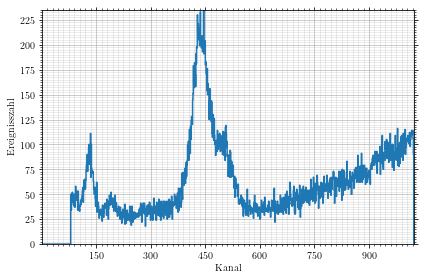

In [84]:
plot_spec(cal_eu)

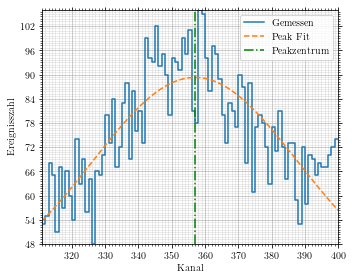

In [85]:
p_cs_1, d_p_cs_1 = calibrate_peak(cal_cs, 310, 400, save=('cs', 'calibrate'))

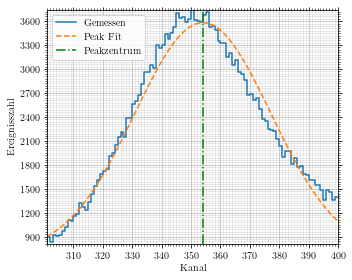

In [86]:
p_ba_1, d_p_ba_1 = calibrate_peak(cal_ba, 300, 400, save=('ba_1', 'calibrate'))

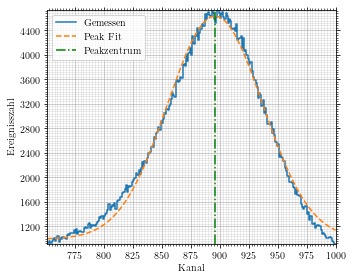

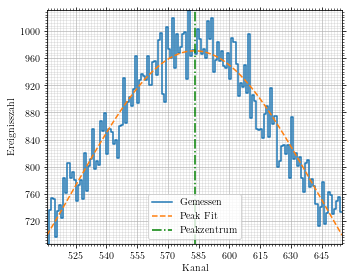

In [87]:
p_ba_2, d_p_ba_2 = calibrate_peak(cal_ba, 750, 1000, save=('ba_2', 'calibrate'))
p_ba_3, d_p_ba_3 = calibrate_peak(cal_ba, 510, 655, save=('ba_3', 'calibrate'))

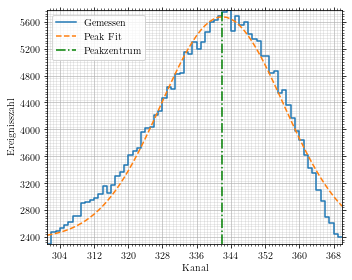

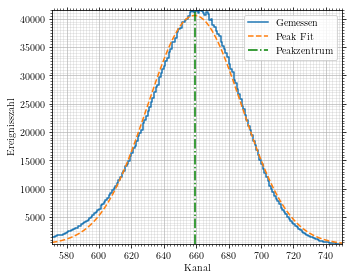

In [88]:
p_am_1, d_p_am_1 = calibrate_peak(cal_am, 300, 370, save=('am_1', 'calibrate'))
p_am_2, d_p_am_2 = calibrate_peak(cal_am, 570, 750, save=('am_2', 'calibrate'))

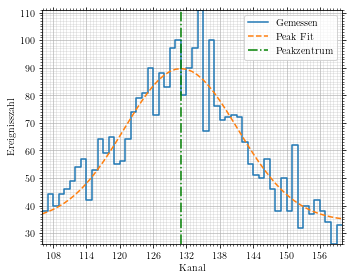

In [89]:
p_eu_1, d_p_eu_1 = calibrate_peak(cal_eu, 105, 160, save=('eu_1', 'calibrate'))

In [90]:
peaks, d_peaks = [p_ba_1, p_ba_2, p_am_1, p_am_2, p_eu_1], [d_p_ba_1, d_p_ba_2, d_p_am_1, d_p_am_2, d_p_eu_1]

In [91]:
peaks, d_peaks = [p_cs_1, p_ba_1, p_ba_2, p_ba_3, p_am_1, p_am_2, p_eu_1], \
    [d_p_cs_1, d_p_ba_1, d_p_ba_2, d_p_ba_3, d_p_am_1, d_p_am_2, d_p_eu_1]

In [92]:
d_peaks

[10.795334284600182,
 0.934505159043513,
 0.591736504144252,
 9.396048078697445,
 0.7153353310146178,
 0.4132437386972448,
 1.3554772468396568]

In [93]:
def Ef(x, a, b):
    return (x - a)/b
    

In [94]:
pe, d_pe = curve_fit(Ef, energies, peaks, sigma=d_peaks)
d_pe =  np.sqrt(np.diag(d_pe))

In [95]:
pe, d_pe

(array([-5.76392618,  0.09795596]), array([1.52291505, 0.00234475]))

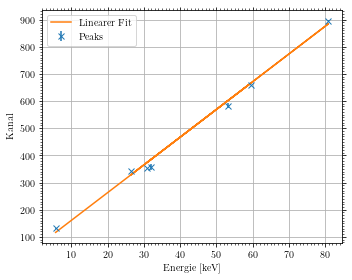

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
pinmp_ticks(ax.xaxis, 10)
pinmp_ticks(ax.yaxis, 10)
ax.grid(which='major')
ax.tick_params(right=True, top=True, which='both')
ax.set_xlabel('Energie [keV]')
ax.set_ylabel('Kanal')
ax.errorbar(energies, peaks, linestyle='None', marker='x', yerr=d_peaks, label='Peaks')
ax.plot(energies, Ef(np.array(energies), *pe), label='Linearer Fit')
ax.legend()
save_fig(fig, 'energy_fit', 'calibrate')


In [97]:
EE = SecondaryValue('b*K+a', defaults=dict(a=(pe[0], d_pe[0]), b=(pe[1], d_pe[1])))

In [98]:
EE(K=peaks[-2])

(58.78905162282078, 2.1695334551408973)

In [99]:
e_am_2

59.5409

In [100]:
am_2 = load_spectrum('../messung/2/2_90.dat', absolute=True)
am_2_0 = load_spectrum('../messung/2/3_90_0.dat', absolute=True)

(<Figure size 360x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8e98716e80>)

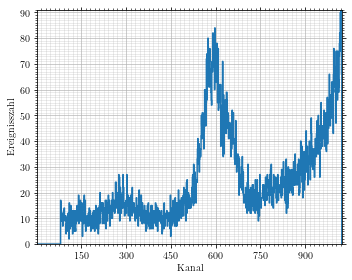

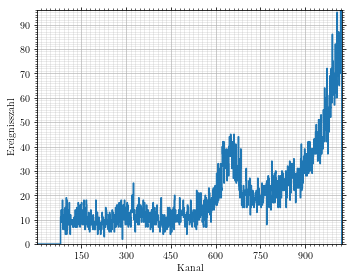

In [101]:
plot_spec(am_2, save=('am_90', 'hists'))
plot_spec(am_2_0, save=('am_90_0', 'hists'))


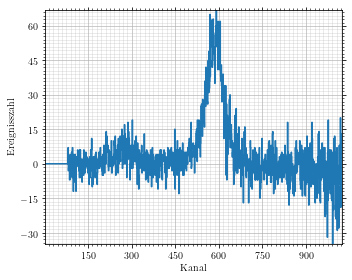

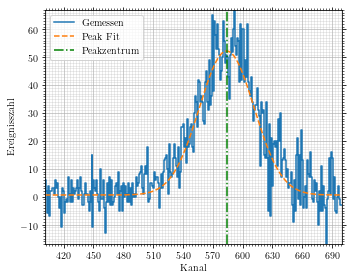

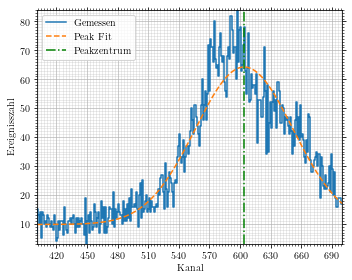

In [102]:
plot_spec(am_2 - am_2_0, save=('am_90_sub', 'hists'))
am_2p, d_am_2p = calibrate_peak(am_2 - am_2_0, 400, 700, save=('am_90_sub_fit', 'hists'))
am_2pu, d_am_2pu = calibrate_peak(am_2, 400, 700, save=('am_90_fit', 'hists'))

In [103]:
scientific_round(*EE(K=(am_2p, d_am_2p)))

(51.4, 2.1)

In [104]:
scientific_round(*EE(K=(am_2pu, d_am_2pu)))


(53.4, 2.1)

In [105]:
E(theta=(90, .1), E_in=e_am_2)

(50.94506367477221, 0.454067176689402)

In [106]:
t = (1200 + 1165.2)/2
N = am_2[530:780].sum()/t
N0 = am_2_0[530:780].sum()/t
t, N, N0, np.sqrt(am_2[530:780].sum())/t, np.sqrt(am_2_0[530:780].sum())/t

(1182.6,
 7.9621173685100635,
 4.683747674615255,
 0.08205316739866873,
 0.06293290913695121)

In [107]:
tt = t_opt(N_g=N, N_0=N0, prec=([.05, .03],))
d_tt = d_t_opt(N_g=N, N_0=N0, prec=([.05, .03],), t=t)

In [108]:
tt/60


array([ 7.84406946, 21.78908184])

In [109]:
p_am_2

659.0

In [110]:
N0

4.683747674615255

In [111]:
d_tt/60

array([1.5808687 , 4.39130194])

In [112]:
am_2_0[530:780].sum()

5539.0

# E(mu)

In [113]:
deg_angles = np.array([30, 45, 60, 75, 90, 105, 120])
angles = np.array([30, 45, 60, 75, 90, 105, 120])*np.pi/180
e_ref, deps = E(E_in=e_am_2, theta=(angles,), retdeps=True)
mus = deps['mu'][0]

In [114]:
deps

{'mu': ((array([ 8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
           6.12323400e-17, -2.58819045e-01, -5.00000000e-01]),), {}),
 'kappa': ((0.116518634725179,), {})}

In [115]:
e_am_1*1e3

26344.6

In [116]:
e_ref

array([58.62572101, 57.57597488, 56.26305294, 54.80763619, 53.32727833,
       51.92478644, 50.68268424])

In [117]:
a_30 = load_spectrum('../messung/angles/4_30.SPC.dat', absolute=True)
a_30_0 = load_spectrum('../messung/angles/4_30_null.SPC.dat', absolute=True)

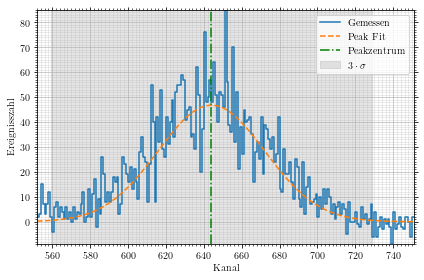

In [118]:
tp = find_peak(a_30, a_30_0, [450, 800], 100)

In [119]:
np.array(area(s=tp[2:4], A=tp[4:6], O=tp[6]))/(7*60)

array([7.86240591, 0.45120056])

In [120]:
area(s=1, O=1, A=1)

3.5066282746310007

In [121]:
angle_specs = np.array([[load_spectrum(f'../messung/angles/4_{i}.SPC.dat', absolute=True) for i in deg_angles], [load_spectrum(f'../messung/angles/4_{i}_null.SPC.dat', absolute=True) for i in deg_angles]])

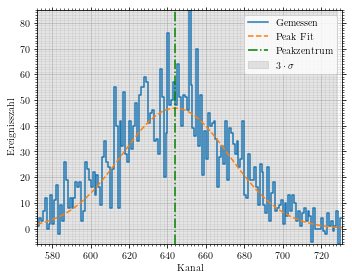

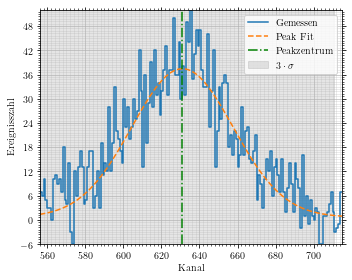

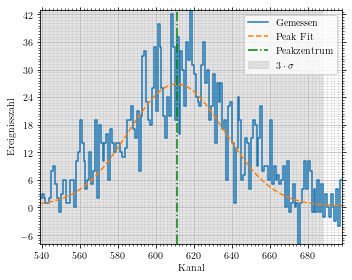

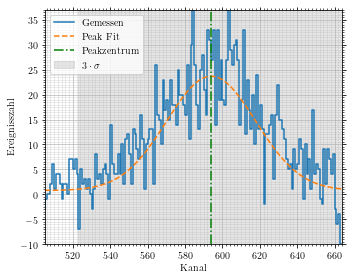

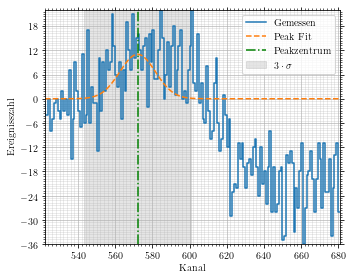

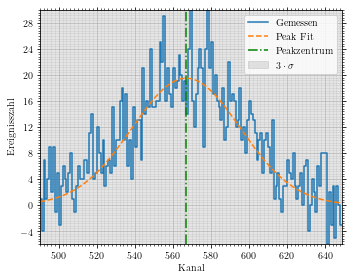

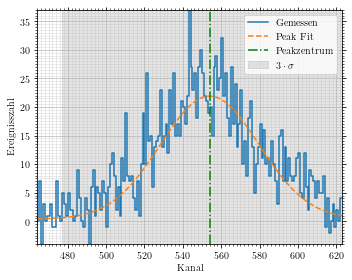

In [122]:
peaks = np.array([np.array(find_peak(angle_specs[0][i], angle_specs[1][i], [450, 800], 80, save=(str(deg_angles[i]), 'winkelmessung'))) for i in range(angle_specs.shape[1])])

In [123]:
angle_energies = EE(K=(peaks[:,0],peaks[:,1]))

/home/hiro/p3334-pracb/Projects/UNI/Prakt/FP/CS/auswertung/utility.py:73: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(mu)*180/np.pi


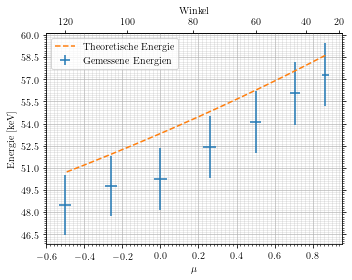

In [124]:
fig, ax = set_up_angle_plot()
mus, d_mus = mu(theta=(angles, 2*np.pi/180))
ax.set_ylabel('Energie [keV]')
smooth = np.linspace(deg_angles.min(), deg_angles.max(), 1000)*np.pi/180
ax.errorbar(mus, angle_energies[0], xerr=d_mus, yerr=angle_energies[1], label='Gemessene Energien', linestyle='None')
ax.plot(np.cos(smooth),E(E_in=e_am_2, theta=[smooth,1])[0], label='Theoretische Energie', linestyle='--')
ax.legend()
save_fig(fig, 'energycurve', 'winkelmessung')


In [125]:
angle_energies

(array([57.31971222, 56.04628474, 54.08716553, 52.42191421, 50.26688308,
        49.77710328, 48.5036758 ]),
 array([2.15901168, 2.13651454, 2.10887741, 2.08271753, 2.09660909,
        2.04375872, 2.01741245]))

In [126]:
mus

array([ 8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
        6.12323400e-17, -2.58819045e-01, -5.00000000e-01])

In [127]:
peaks

array([[6.44000000e+02, 2.54011702e+00, 2.81246280e+01, 1.47510864e+00,
        4.68152263e+01, 1.99482457e+00, 1.34460976e-22, 9.49925820e-01],
       [6.31000000e+02, 2.42444059e+00, 2.66667305e+01, 1.40375335e+00,
        3.67646129e+01, 1.58425454e+00, 6.61944458e-01, 7.82612861e-01],
       [6.11000000e+02, 2.80759755e+00, 2.54482901e+01, 1.58327314e+00,
        2.65410177e+01, 1.43867190e+00, 3.10564705e-01, 6.24595260e-01],
       [5.94000000e+02, 2.86221732e+00, 2.38276666e+01, 1.53539166e+00,
        2.29337906e+01, 1.41730342e+00, 7.49989406e-01, 5.18821976e-01],
       [5.72000000e+02, 5.37964771e+00, 9.59226724e+00, 2.75939451e+00,
        1.10000000e+01, 3.18132227e+00, 7.38607215e-29, 8.30821582e-01],
       [5.67000000e+02, 3.06576526e+00, 2.85090756e+01, 1.86022744e+00,
        1.94975573e+01, 9.45929222e-01, 1.15732900e-17, 6.16575420e-01],
       [5.54000000e+02, 2.56863764e+00, 2.56729848e+01, 1.41929623e+00,
        2.15262806e+01, 1.07086439e+00, 3.76781597e-01, 4.

In [128]:
rates = np.array([find_rates(angle_specs[0][i], angle_specs[1][i], 7*60, peaks[i][0],
                             peaks[i][2]) for i in range(angle_specs.shape[1])])

In [129]:
rates

array([[9.08571429, 0.28300301],
       [6.94761905, 0.20292644],
       [5.10952381, 0.16485409],
       [4.2       , 0.14979199],
       [1.15      , 0.11346431],
       [3.76904762, 0.13198725],
       [4.03571429, 0.12977829]])

/home/hiro/p3334-pracb/Projects/UNI/Prakt/FP/CS/auswertung/utility.py:73: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(mu)*180/np.pi


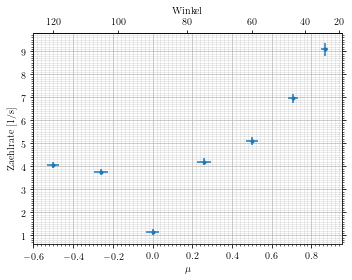

In [130]:
fig, ax = set_up_angle_plot()
ax.set_ylabel('Zaehlrate [1/s]')
ax.errorbar(mus, rates.T[0], xerr=d_mus, yerr=rates.T[1], linestyle='None', marker='.')
save_fig(fig, 'countrates', 'crossec')


/home/hiro/p3334-pracb/Projects/UNI/Prakt/FP/CS/auswertung/utility.py:73: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(mu)*180/np.pi


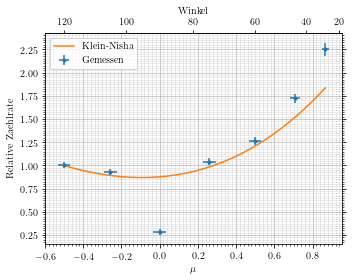

In [131]:
fig, ax = set_up_angle_plot()
ax.set_ylabel('Relative Zaehlrate')
ax.errorbar(mus, rates.T[0]/rates.T[0][-1], xerr=d_mus, yerr=rates.T[1]/rates.T[0][-1], linestyle='None', marker='.', label='Gemessen')
smooth = np.linspace(mus.min(), mus.max())
crossec = klein_nisha(smooth, e_am_2)
ax.plot(smooth, crossec/klein_nisha(mus[-1], e_am_2), label='Klein-Nisha')
ax.legend()
save_fig(fig, 'rel_countrates', 'crossec')


In [132]:
thicks = np.sort(np.array([10, 20, 2, 4, 6]))
exact_thicks = np.sort(np.array([10.2, 20.4, 2.3, 4.4, 6.6]))
thick_0 = angle_specs[1][2]
thick_specs = np.array([load_spectrum(f'../messung/thick/5_{i}mm.SPC.dat', absolute=True) for i in thicks])

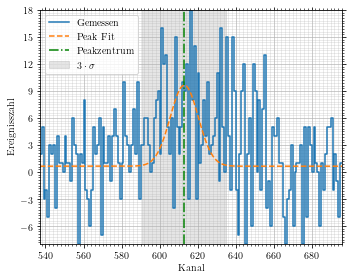

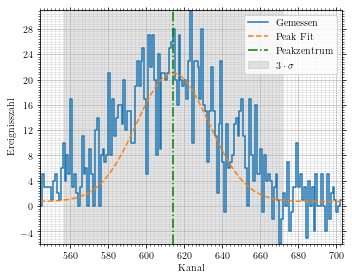

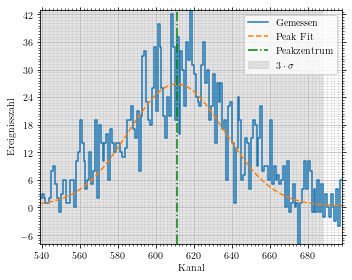

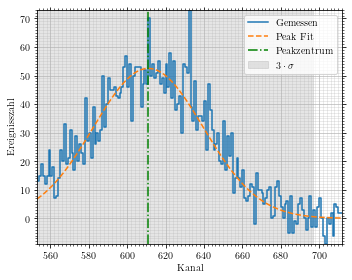

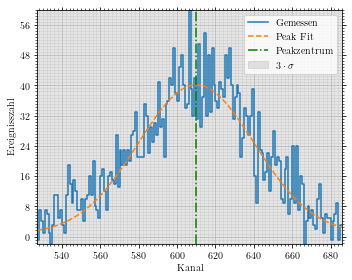

In [133]:
thick_peaks = np.array([np.array(find_peak(thick_specs[i], thick_0, [450, 700], 80, save=(str(thicks[i]), 'dicke'))) for i in range(len(thicks))])

In [134]:
thick_rates = np.array([find_rates(thick_specs[i], thick_0, 7*60, thick_peaks[i][0],
                             thick_peaks[i][2]) for i in range(len(thicks))])

In [135]:
thick_rates

array([[0.63333333, 0.08261596],
       [3.41904762, 0.14467102],
       [5.10952381, 0.16485409],
       [9.87619048, 0.19971635],
       [8.12619048, 0.1897755 ]])

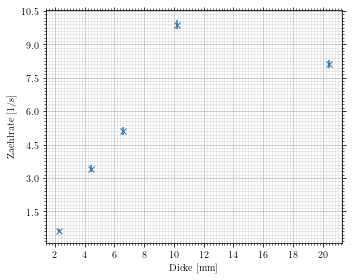

In [136]:
fig, ax = set_up_plot(pimp_top=True)
ax.errorbar(exact_thicks, thick_rates[:,0], yerr=thick_rates[:,1], linestyle='None', marker='x')
ax.set_xlabel('Dicke [mm]')
ax.set_ylabel('Zaehlrate [1/s]')
save_fig(fig, 'countrate', 'dicke')

In [137]:
thick_rates

array([[0.63333333, 0.08261596],
       [3.41904762, 0.14467102],
       [5.10952381, 0.16485409],
       [9.87619048, 0.19971635],
       [8.12619048, 0.1897755 ]])

In [138]:
dists = np.array([7, 9, 12])
dist_specs = np.array([[load_spectrum(f'../messung/dist/7_{i}cm.SPC.dat', absolute=True) for i in dists], [load_spectrum(f'../messung/dist/7_{i}cm_null.SPC.dat', absolute=True) for i in dists]])

OSError: ../messung/dist/7_7cm.SPC.dat not found.

In [139]:
plot_spec(dist_specs[0][0] - dist_specs[1][0])
find_peak(dist_specs[0][0], dist_specs[1][0], [160, 300], 100)

NameError: name 'dist_specs' is not defined

In [140]:
dist_peaks = np.array([np.array(find_peak(dist_specs[0][i], dist_specs[1][i], [160, 300], 100, save=(str(dists[i]), 'dists'))) for i in range(len(dists))])

NameError: name 'dist_specs' is not defined

In [141]:
dist_rates = np.array([find_rates(dist_specs[0][i], dist_specs[1][i], 7*60, dist_peaks[i][0],
                             dist_peaks[i][2]) for i in range(len(dists))])

NameError: name 'dist_specs' is not defined

NameError: name 'dist_rates' is not defined

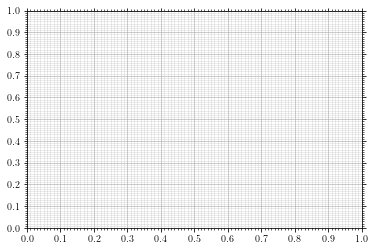

NameError: name 'dist_rates' is not defined

In [142]:
fig, ax = set_up_plot(pimp_top=True)
ax.errorbar(dists, dist_rates[:,0], yerr=dist_rates[:,1], linestyle='None', marker='x')
ax.set_xlabel('Entfernung [cm]')
ax.set_ylabel('Zaehlrate [1/s]')
save_fig(fig, 'countrates', 'dists')

NameError: name 'dist_peaks' is not defined

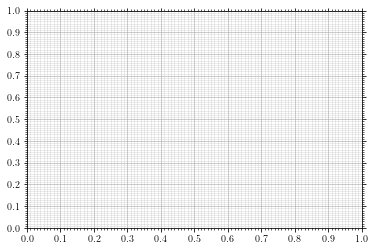

NameError: name 'dist_peaks' is not defined

In [143]:
fig, ax = set_up_plot(pimp_top=True)
ax.errorbar(dists, dist_peaks[:, 2], yerr=dist_peaks[:, 3], linestyle='None', marker='x')
ax.set_xlabel('Entfernung [cm]')
ax.set_ylabel('Sigma [Kanal]')
save_fig(fig, 'widths', 'dists')

In [144]:
dist_rates

NameError: name 'dist_rates' is not defined